In [70]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn import model_selection
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error
from sklearn.datasets import load_diabetes, load_digits
from sklearn.preprocessing import PolynomialFeatures


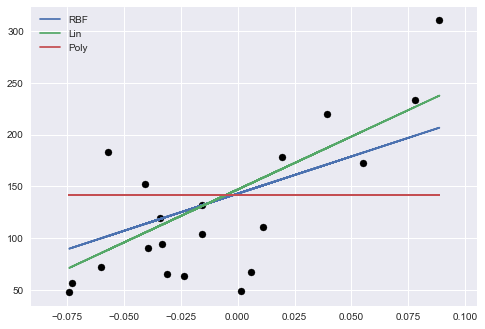

Mean squared error linear: 2310.87
Mean absolute error linear: 37.91
Mean squared error RBF: 2614.96
Mean absolute error RBF: 42.50
Mean squared error Polynomial(2): 5065.25
Mean absolute error Polynomial(2): 61.15


In [71]:
#http://scikit-learn.org/stable/datasets/index.html

df = load_diabetes()

df_X = df.data[:, np.newaxis, 2]

df_X_train = df_X[:-20]
df_X_test = df_X[-20:]

df_y_train = df.target[:-20]
df_y_test = df.target[-20:]

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=10)
y_rbf = svr_rbf.fit(df_X_train, df_y_train).predict(df_X_test)
y_lin = svr_lin.fit(df_X_train, df_y_train).predict(df_X_test)
y_poly = svr_poly.fit(df_X_train, df_y_train).predict(df_X_test)

plt.figure()
plt.scatter(df_X_test, df_y_test, color='black')
plt.plot(df_X_test, y_rbf, label='RBF')
plt.plot(df_X_test, y_lin, label='Lin')
plt.plot(df_X_test, y_poly, label='Poly')
plt.legend()
#plt.savefig("MSE,MAE.png", bbox_inches='tight')
plt.show()

print("Mean squared error linear: %.2f" %mean_squared_error(df_y_test, y_lin))
print("Mean absolute error linear: %.2f" %mean_absolute_error(df_y_test, y_lin))
print("Mean squared error RBF: %.2f" %mean_squared_error(df_y_test, y_rbf))
print("Mean absolute error RBF: %.2f" %mean_absolute_error(df_y_test, y_rbf))
print("Mean squared error Polynomial(2): %.2f" %mean_squared_error(df_y_test, y_poly))
print("Mean absolute error Polynomial(2): %.2f" %mean_absolute_error(df_y_test, y_poly))